# Supervised Machine Learning

The majority of practical machine learning uses supervised learning.

Supervised learning is where you have input variables (X) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output.

Y = f(X)

The goal is to approximate the mapping function so well that when you have new input data (X) that you can predict the output variables (y) for that data.

It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process. We know the correct answers, the algorithm iteratively makes predictions on the training data and is corrected by the teacher. Learning stops when the algorithm achieves an acceptable level of performance.

In [ ]:
# 1. Supervised ML -> If the historical output available - Regression, classification
# 2. Unsupervised ML -> If the historical output not available - clustering

# Types of Modelling -

- Regression Models -> where the output is continuous ( predicting the price of a product )
- Classification Models -> where the output is a category / label ( discrete output ) - predicting cancer in a patient
- Recommendation/Clustering Models -> where there is no output upfront, based on similarity, closeness to a group ( which has a preference )

# Types of Learning -

- Supervised - Regression, Classification
- Unsupervised - Recommendation Model
- Semisupervised - Some data available from the past - you use it for supervision and then predict for the remaining data for which you don't have the historical data


# Types of Relationships -

- Linear Relationship - straight line fitting - y = mx + c
- Non Linear Relationship - y is not directly related - but has a equation ( non-linear ) between the 2 - y = 2*x^2 + 5 , y = e^x
- Complex relationships - somewhere linear, somewhere non linear, mix of the two in different positions

In [ ]:
# If the number of input variables is less
# then we can analyse relationship ( using scatter plot ) between input and output - individually
# You understand the complexity of relationship between your input and output data
# Linear Regression Model

# 100 variables - Always start simple
# simplest - Linear Regression - and then keep increasing the complexity of the model
# observe the performance of the model and choose wisely

In [ ]:
# Multiple types of regression model
# Linear Regression
# Polynomial Regression
# DT R
# RF R
# XG Boost R
# DNN

In [ ]:
# Overfitting and Underfitting
# Train and Test Split


# Regression Models -

1. Linear Regression Model
2. Multi Linear Regression Model
3. Polynomial Regression Model

### Linear Regression

![](https://www.biomedware.com/files/documentation/spacestat/Statistics/Multivariate_Modeling/Regression/regression_line.png)

Linear regression is one of the simplest supervised learning algorithms in our toolkit. Linear regression—and its extensions—continues to be a common and useful method of making predictions when the target vector is a quantitative value (e.g., home price, age).

Linear regression models linear relationship among variables. An example of a linear relationship would be the number of stories a building has and the building’s height. In linear regression, we assume the effect of number of stories and building height is approximately constant, meaning a 20-story building will be roughly twice as high as a 10-story building, which will be roughly twice as high as a 5-story building.

More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term) as shown below:
$$\hat{y}=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$
where

* $\hat{y}$ is the predicted value
* $n$ is the number of features
* $x_i$ is the ith feature value
* $\theta_1,\theta_2,...,\theta_n$ are feature weights (parameters or coefficients) and $\theta_0$ is the bias term (or intercept)

In [ ]:
# y  = ax + b # Univariate
# y = ax1 + bx2 + c # more than 2 variables - Multivariate
# y = ax^2 + bz^2 +c # At least one power of input variables >1 # Polynomial Regression

Why are we learning linear regression?
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods

# Regression Case Study: Old car price prediction

Problem Statement: Predict the price of a second hand car based on its features
* Target Variable: price
* Predictor Variables: Age of car, Fuel Type, Kms driven etc.

## Exploring the data

In [ ]:
%pip install --upgrade pip

In [ ]:
# %pip install -r requirements.txt

In [ ]:
#%pip install seaborn

In [ ]:
# Reading the dataset
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
CarPricesData=pd.read_csv("CarPricesData.csv", encoding='latin')
print('Shape before deleting duplicate values:', CarPricesData.shape)

Shape before deleting duplicate values: (1436, 10)


In [ ]:
CarPricesData.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [ ]:
# Checking duplicates rows and Removing duplicate rows if any
print(CarPricesData.duplicated().value_counts())
CarPricesData.drop_duplicates(inplace = True)
print('Shape After deleting duplicate values:', CarPricesData.shape)

False    1435
True        1
Name: count, dtype: int64
Shape After deleting duplicate values: (1435, 10)


In [ ]:
CarPricesData.head()
# Start observing the Quantitative/Categorical/Qualitative variables

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [ ]:
# Observing the summarized information of data
# Data types, Missing values etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
CarPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


In [ ]:
# Looking at the statistial distribution of the data
# Observe that the min values of Age and KM column is an outlier
CarPricesData.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1431,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10720.915679,56.020237,68571.782578,NaN,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,NaN,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


## Observe the distribution of target variable

* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure there is no Zeros in the target variable, as it will cause divide by Zero exeption later on for accuracy calculation

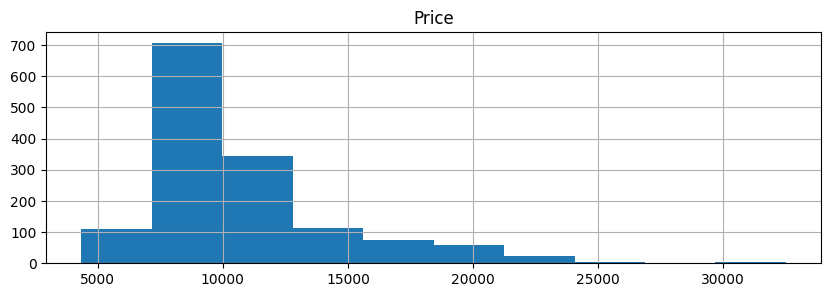

In [ ]:
CarPricesData.hist(['Price'], figsize=[10,3])
plt.show()
# Observe the outlier Prices

In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
CarPricesData.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

## Visualize distribution of all the categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

In [ ]:
CarPricesData.groupby('FuelType').size()

FuelType
CNG         17
Diesel     154
Petrol    1260
dtype: int64

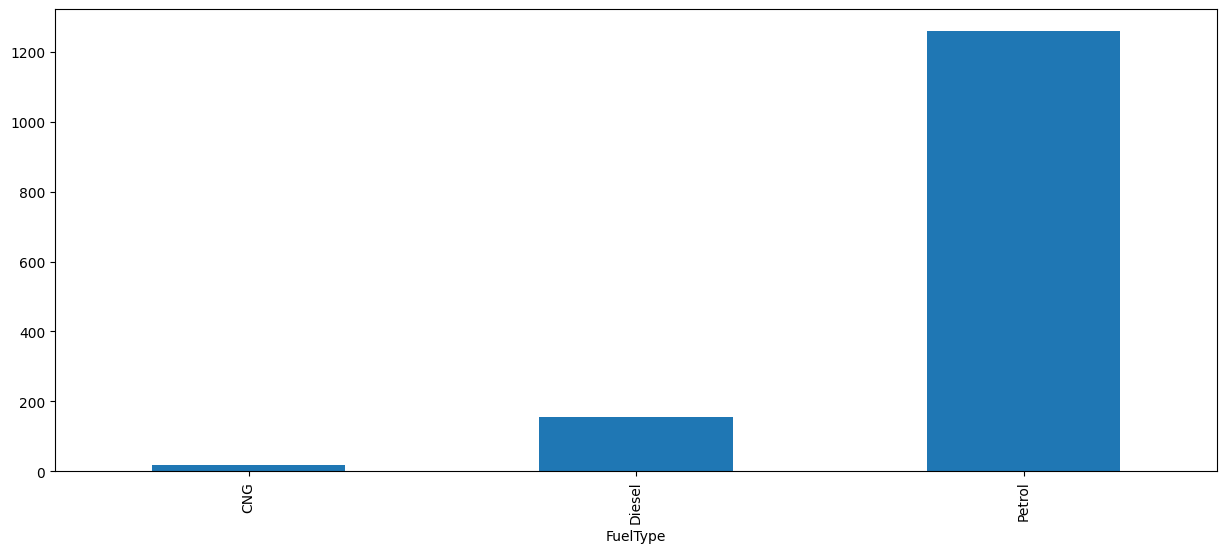

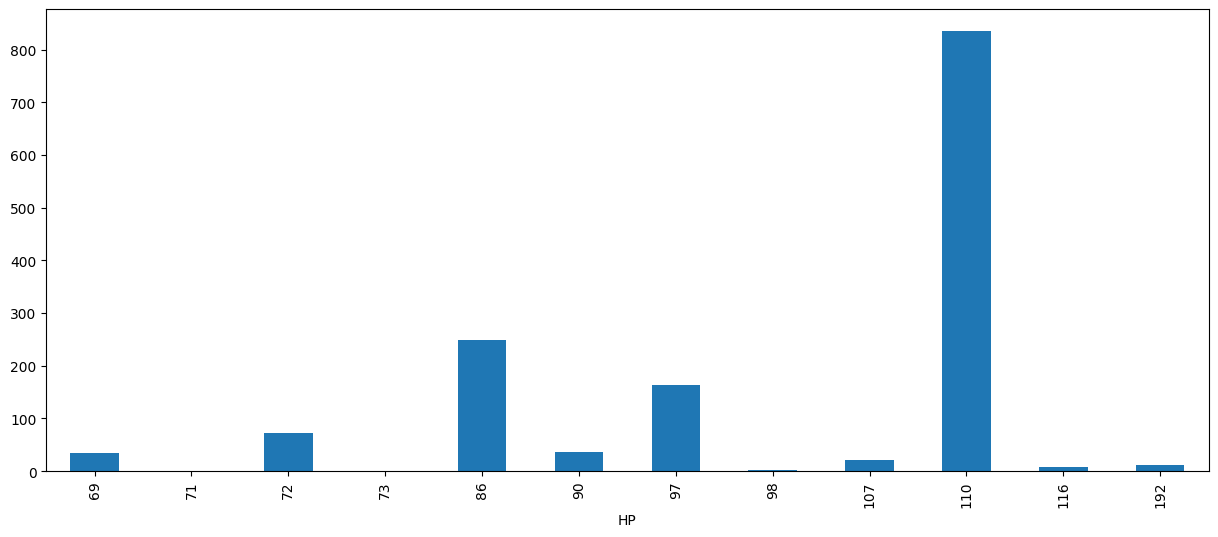

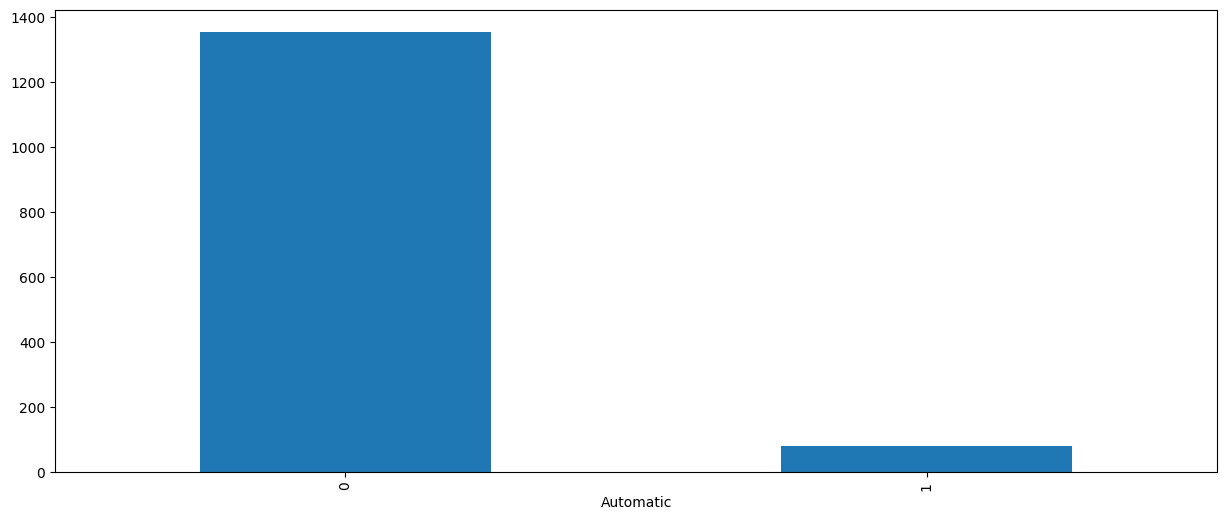

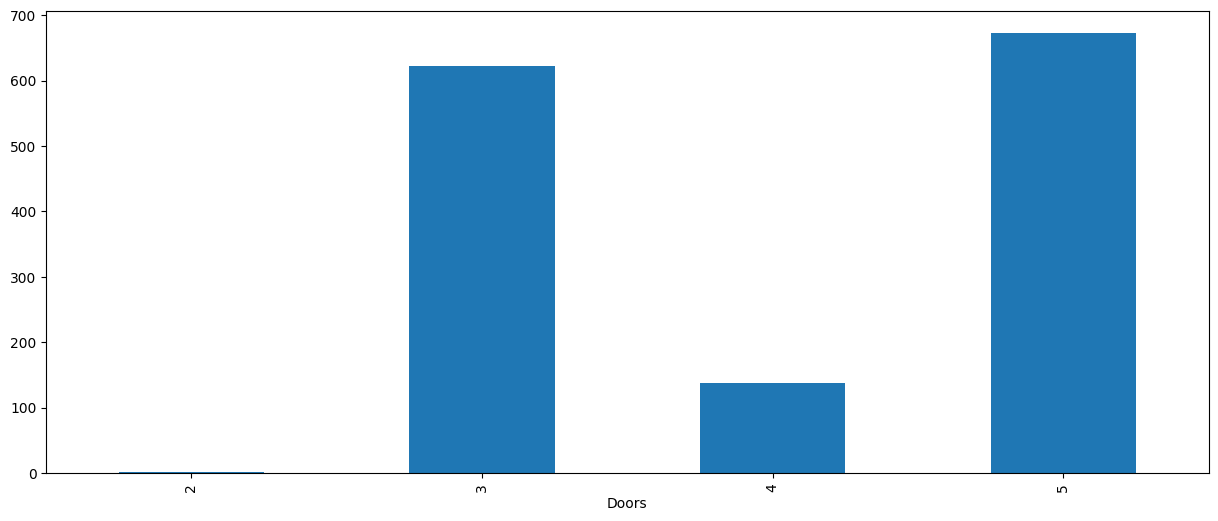

In [ ]:
colsToPlot=['FuelType', 'HP','Automatic','Doors']
for col in colsToPlot:
    plt.figure(figsize=(15,6))
    CarPricesData.groupby(col).size().plot(kind='bar')
    plt.show()

## Visualize distribution of all the numeric Predictor variables in the data using histograms

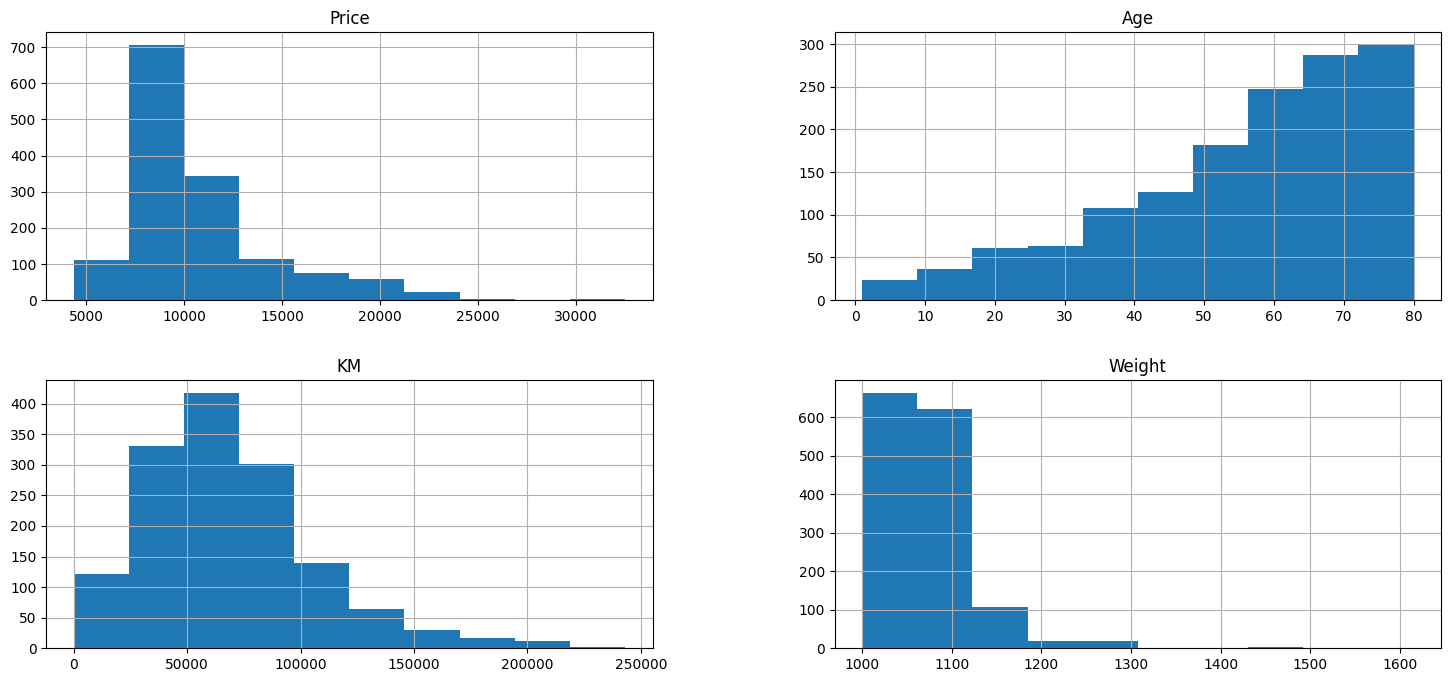

In [ ]:
# Plotting histograms of multiple columns together
CarPricesData.hist(['Price','Age', 'KM', 'Weight'], figsize=(18,8))
plt.show()

## Visual Exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Continuous Vs Categorical---- Bar Plot, Box Plot
* Categorical Vs Categorical---- Bar Plot

## Relationship exploration: Continuous Vs Continuous
When the target variable is continuous and the predictor variable is also continuous we analyze the relation using scatter plot and measure the strength of relation using correlation

## Generating graphs for all numeric columns in data
* This gives a birds eye view about the numeric variables which looks correlated with Target Variable "Price"
* Do not run scatter_matrix() command for more than 10 variables at a time for performance issues

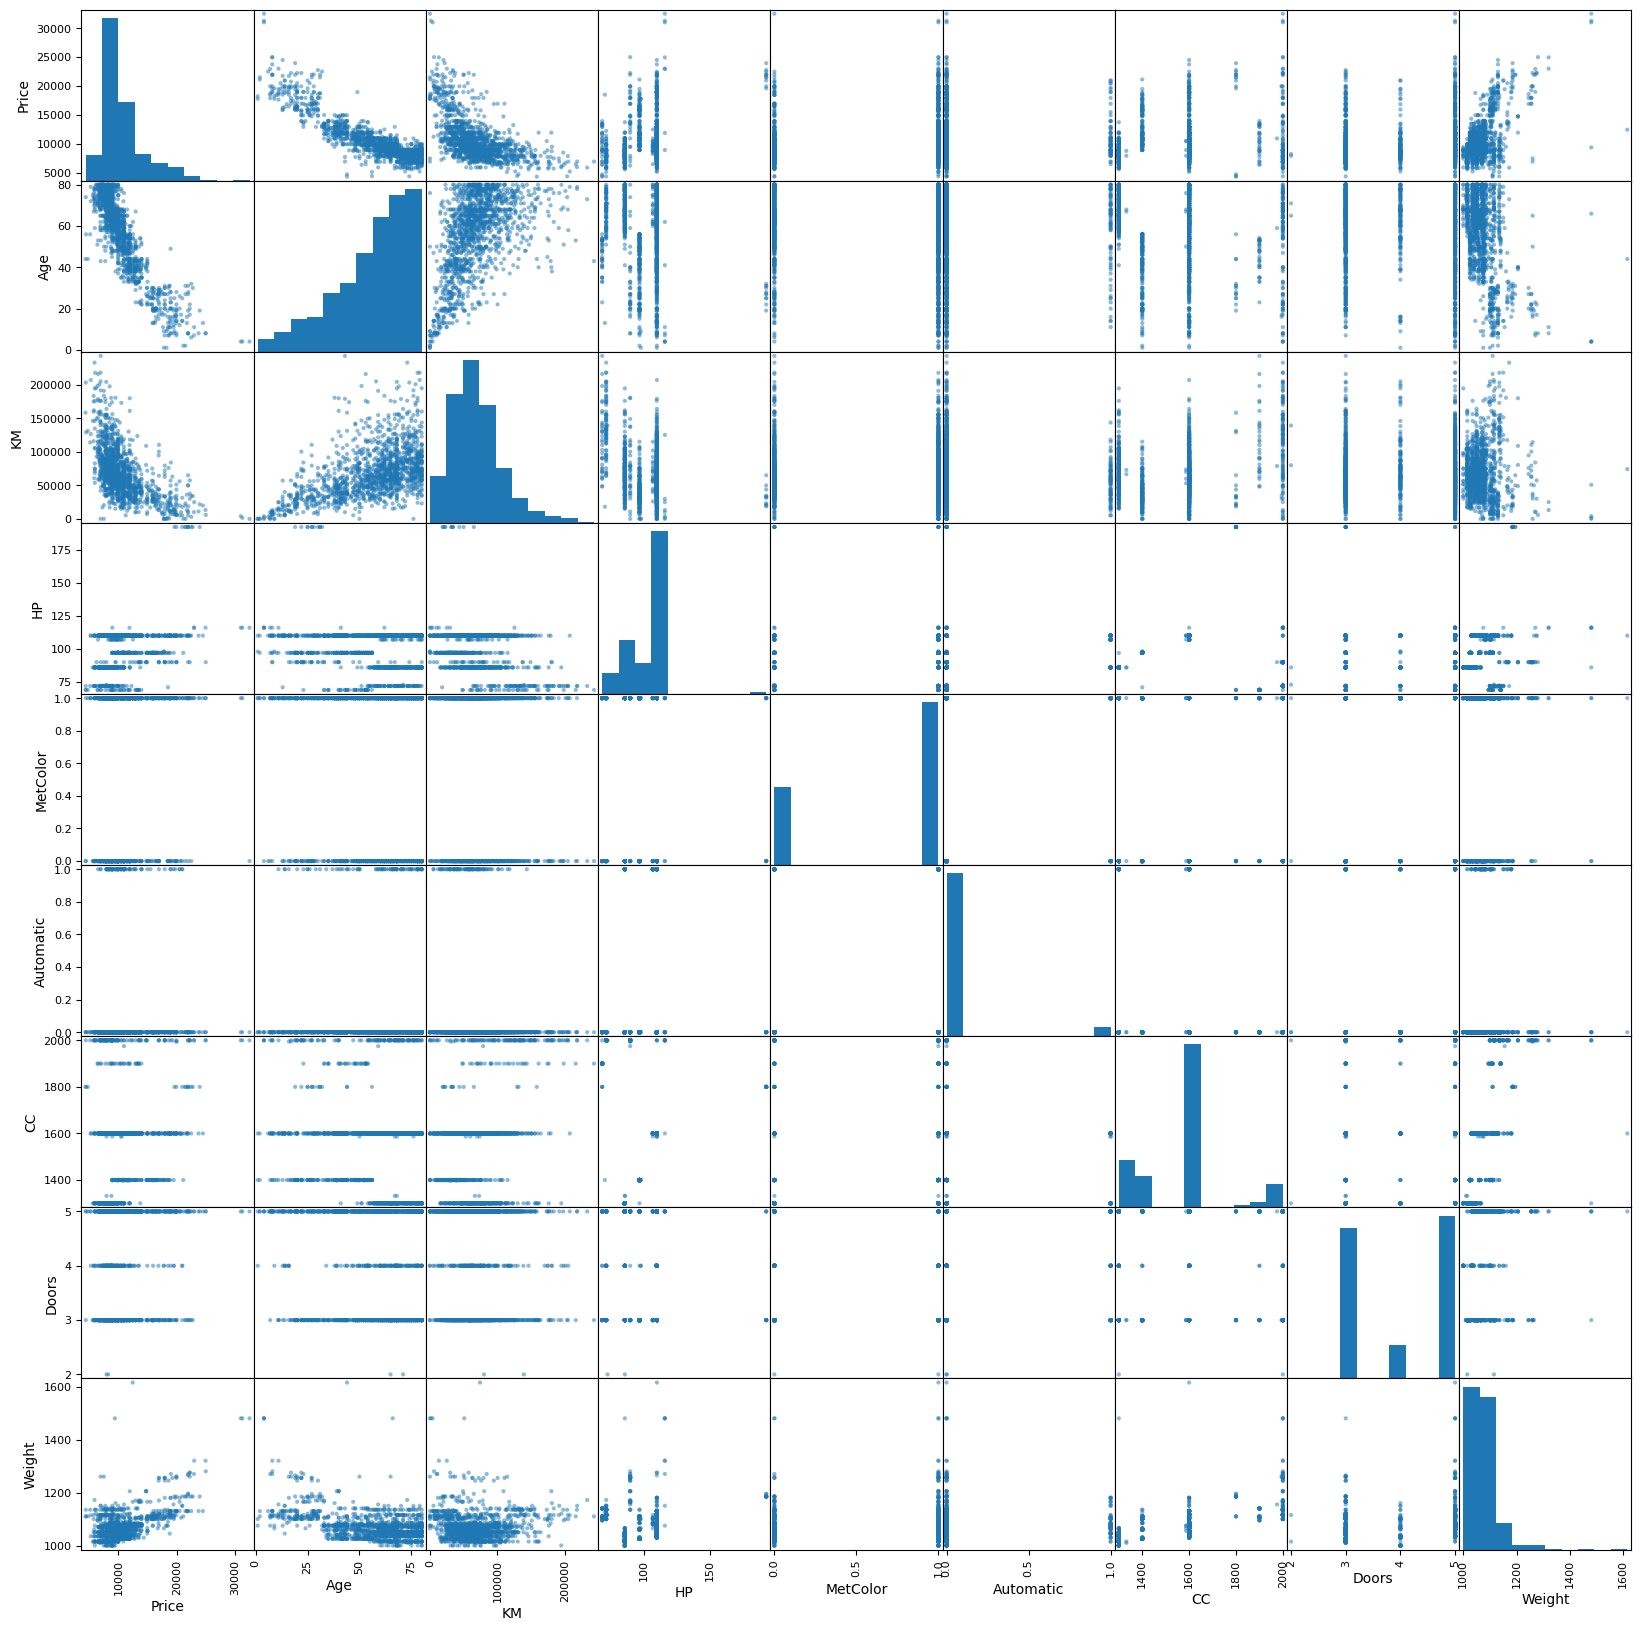

In [ ]:
# Creating histograms and scatter plots for all the numeric columns in data
# Storing the returned result array into a variable
# Observe the histograms for all variables and look for extreme skewness
FullDataPlot=pd.plotting.scatter_matrix(CarPricesData, figsize=(20,20))

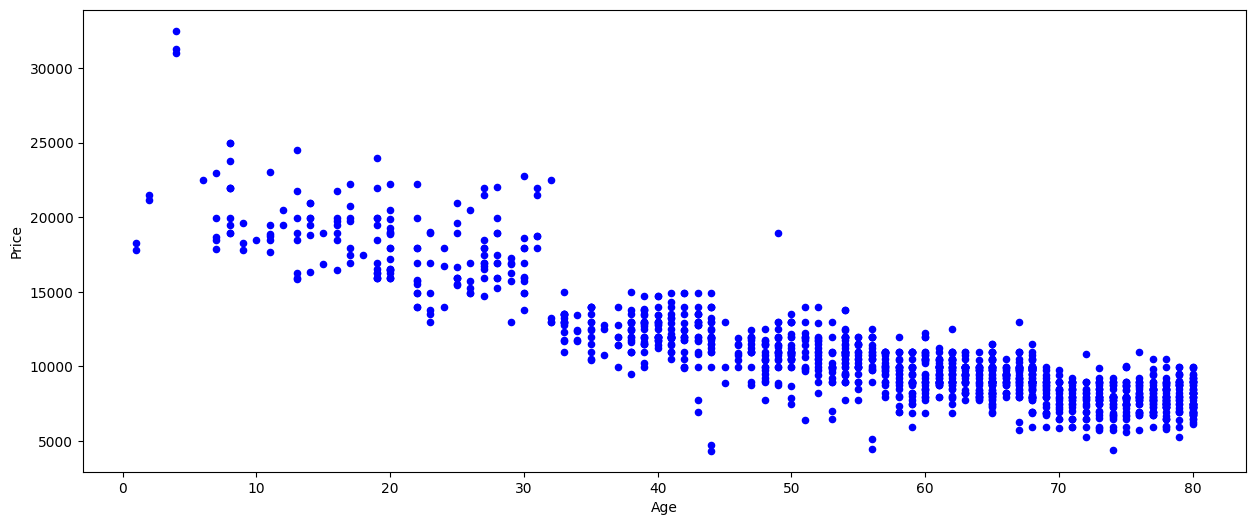

In [ ]:
# Taling closer look at the Scatter plot between Price Vs Age
CarPricesData.plot.scatter(x='Age', y='Price', figsize=(15,6), marker='o', color='blue')
plt.show()

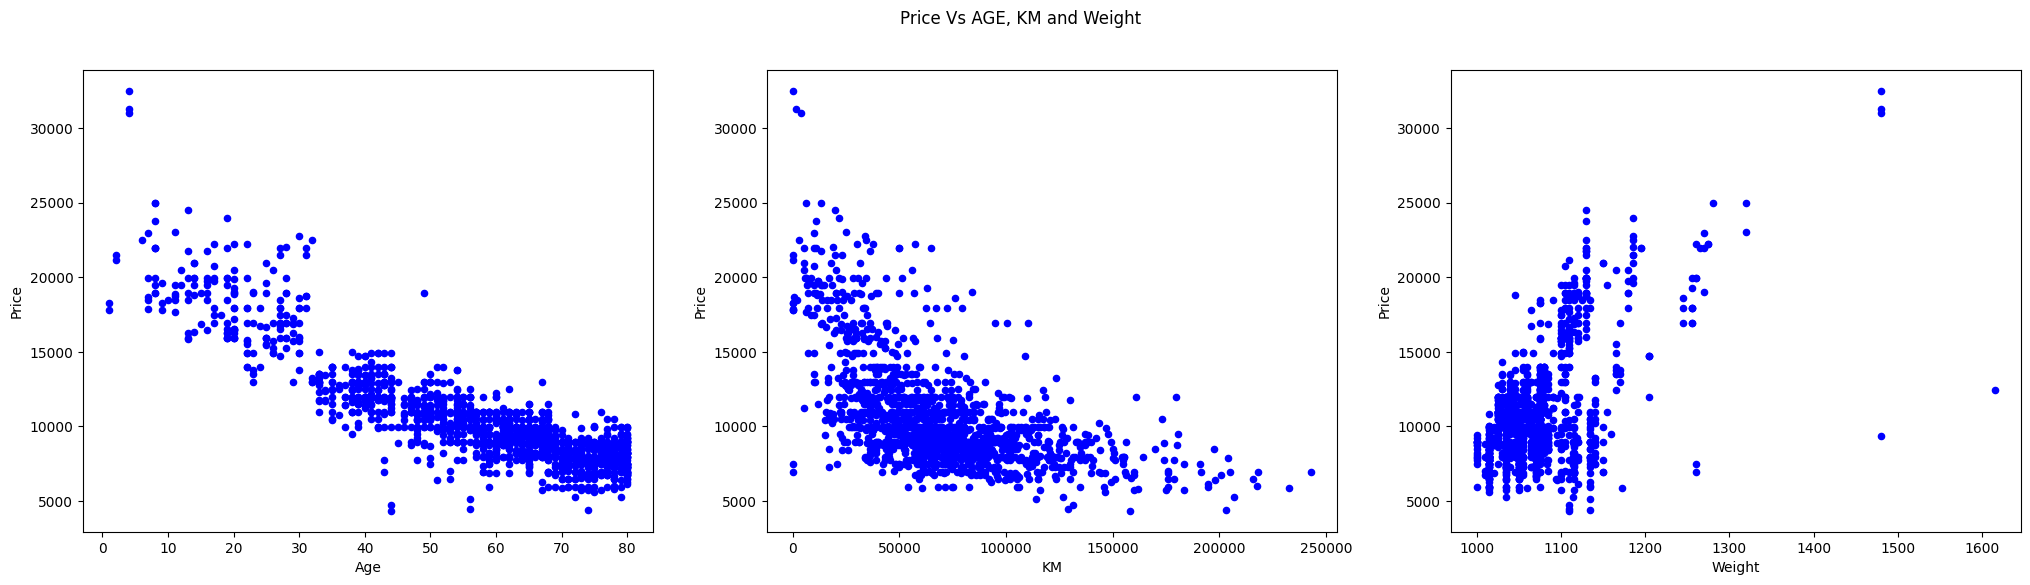

In [ ]:
# Generating multiple subplots
fig, subPlot=plt.subplots(nrows=1, ncols=3, figsize=(25,6))

# Creating the super title of the charts
fig.suptitle('Price Vs AGE, KM and Weight')

# Generating multiple scatter charts
CarPricesData.plot.scatter(x='Age', y='Price', marker='o', color='blue', ax=subPlot[0])
CarPricesData.plot.scatter(x='KM', y='Price', marker='o', color='blue', ax=subPlot[1])
CarPricesData.plot.scatter(x='Weight', y='Price', marker='o', color='blue', ax=subPlot[2])
plt.show()

## Outlier Observation:
* There are few outliers in the data clearly visible for Price > 30,000
* This will bias the regression model, hence, if the number of records are less, it is advisable to remove these records or replace it with a logical value which is nearby to similar records according to the data

In [ ]:
# Finding those rows where price column has outliers
CarPricesData[CarPricesData['Price']>30000]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
109,32500,4.0,1,Diesel,116,0,0,2000.0,5,1480.0
110,31000,4.0,4000,Diesel,116,1,0,2000.0,5,1480.0
111,31275,4.0,1500,Diesel,116,1,0,2000.0,5,1480.0


In [ ]:
# Code to delete the outlier records from the data
# print('Shape before outlier removal', CarPricesData.shape)
# CarPricesData=CarPricesData[CarPricesData['Price']<30000]
# print('Shape after outlier removal', CarPricesData.shape)
# Code to replace the outlier values with a logical value
CarPricesData['Price'][CarPricesData['Price']>30000]=25000
CarPricesData['Price'].describe()

count     1435.000000
mean     10707.135192
std       3540.784461
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      25000.000000
Name: Price, dtype: float64

## Statistical Feature Selection (Continuous Vs Continuous) using Correlation Marix
Finding the top numeric continuous variables which correlate with the target variable

## Correlation Matrix
The correlation matrix is a square matrix that contains the Pearson product-moment
correlation coefficients (often abbreviated as Pearson's r), which measure the linear
dependence between pairs of features. The correlation coefficients are bounded
to the range -1 and 1. Two features have a perfect positive correlation if $r=1$, no
correlation if $r=0$ and a perfect negative correlation if $r=-1$ respectively. Pearson's correlation coefficient can simply be calculated as
the covariance between two features $x$ and $y$ (numerator) divided by the product
of their standard deviations (denominator):  

$$r_{xy}=\frac{\sum{(X_{i}-\bar{X})(y_{i}-\bar{y})}}{\sqrt{\sum(X_{i}-\bar{X})^2 \sum(y_{i}-\bar{y})^2}}$$


* This value can be calculated only between two numeric columns
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [ ]:
# # Creating the correlation matrix
# CorrelationData=CarPricesData.corr()
# CorrelationData

In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Price
# CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

## Relationship exploration: Continuous Vs Categorical
When the target variable is continuous and the predictor variable is categorical we analyze the relation using bar plots and measure the strength of relation using Anova test

## Visualizing the relation between Price and Fuel Type using bar chart
We Group by and keep categorical variable in the X-Axis and the continuous variable in the Y-Axis

In [ ]:
# Grouping by Fuel type to find the aggregated values
GroupedData=CarPricesData.groupby(['FuelType'])

# Printing the aggregated values
#GroupedData.size()
#GroupedData.sum()
#GroupedData.count()
GroupedData.mean()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
FuelType,,,,,,,,,
CNG,9421.176471,56.352941,117865.588235,110.000000,0.764706,0.058824,1599.882353,4.117647,1097.823529
Diesel,11077.474026,51.000000,112618.649351,78.292208,0.655844,0.000000,1976.396104,4.097403,1157.350649
Petrol,10673.649206,56.629571,62554.623810,104.139683,0.675397,0.061905,1516.058824,4.025397,1061.539746


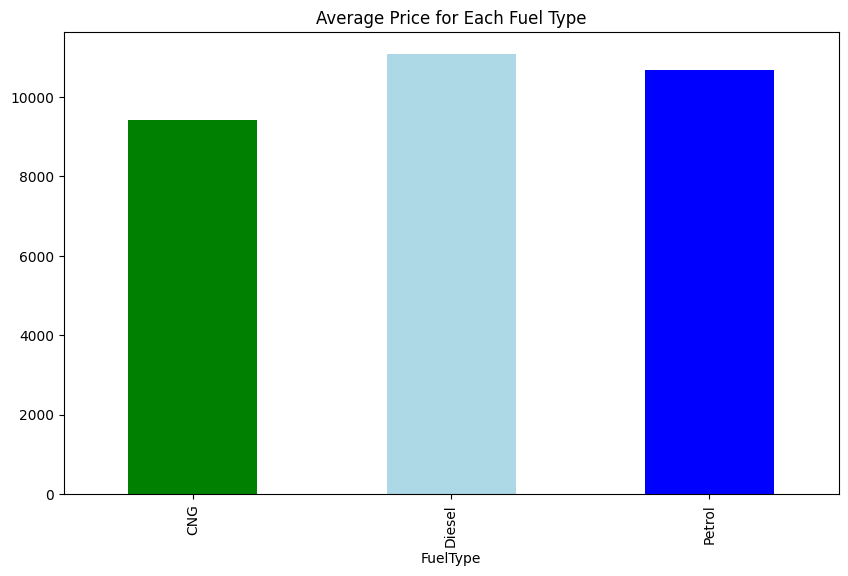

In [ ]:
# Creating the graph with Price
plt.figure(figsize=(10,6))
GroupedData.mean()['Price'].plot(kind='bar', title='Average Price for Each Fuel Type', color=['green','lightblue','blue'])
plt.show()

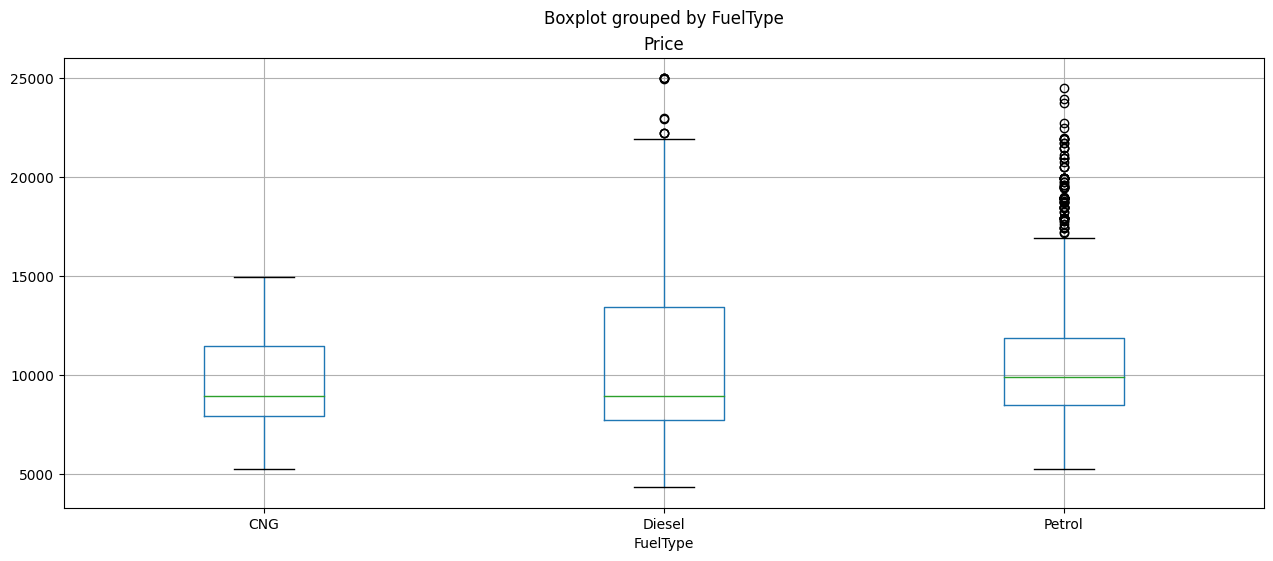

In [ ]:
# Looking at the variances in Price by each fuel type in box plot
# IF the distribution of each type is similar, it gives a hint that there is no correlation
# Between the categorical and the numeric variable
CarPricesData.boxplot(column='Price', by='FuelType', figsize=(15,6))
plt.show()

## Statistical Feature Selection (Continuous Vs Categorical) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical predictor variable)
* ANOVA Test result: Probability of H0 being true

In [ ]:
# f_oneway() function takes the group data as input and returns F-statistic and P-value
from scipy.stats import f_oneway


# Running the one-way anova test between Price and FuelTypes
# Assumption(H0) is that FuelType and Prices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=CarPricesData.groupby('FuelType')['Price'].apply(list)
# Performing the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)


# Extreme example when all values are same and the variables are not correlated
#AnovaResults = f_oneway( [10,20], [10,20], [10,20] )

# Extreme example when all the values are different and both variables has correlation
#AnovaResults = f_oneway( [400,500], [7,10], [0.006,0.00001] )

print('P-Value for Anova is: ', AnovaResults[1])

# We accept the Assumption(H0) only when P-Value > 0.05
# Here the P-Value is > 0.05 by a slight margin!! which means we will Accept the Assumption(H0)
# This means Price and Fuel Type are NOT correlated

P-Value for Anova is:  0.13135816358106872


In [ ]:
# Home work
# Write a function to take 3 inputs and provide the anova results for all the categorical predictors
# FunctionAnova(inputData=CarPricesData, targetVar='Price', categoricalPredictors=['FuelType','MetColor'])

## Data Pre-processing for Machine Learning
* Treating Missing Values (Interpolate/Replace with median/Mode values)
* Treating Outliers (Delete or replace with nearby logical value)
* Converting each Ordinal Categorical columns to numeric
* Converting all nominal Categorical columns to numeric
* Standardization/Normalization(Optional)

## Data Pre-Processing: Treating Missing Values

In [ ]:
# Finding out how many missing values are present in each column
CarPricesData.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

In [ ]:
# Code to delete all the missing values at once
print('Before Deleting missing values:', CarPricesData.shape)
CarPricesDataCleaned=CarPricesData.dropna()
print('After Deleting missing values:', CarPricesDataCleaned.shape)

Before Deleting missing values: (1435, 10)
After Deleting missing values: (1425, 10)


In [ ]:
# Treating missing values in each column

# Replacing by interpolation for a numeric variable
CarPricesData['Age']=CarPricesData['Age'].interpolate(method='linear')

# Replacing with median value a numeric variable
MedianWeight=CarPricesData['Weight'].median()
CarPricesData['Weight']=CarPricesData['Weight'].fillna(value=MedianWeight)

###################################################################################

# Replacing with interpolation for a categorical variable
CarPricesData['FuelType']=CarPricesData['FuelType'].interpolate(method='ffill')

# Replacing with mode value for a categorical variable
ModeCC=CarPricesData['CC'].mode()[0]
CarPricesData['CC']=CarPricesData['CC'].fillna(value=ModeCC)

In [ ]:
# Every column must have Zero missing values before you proceed futher
CarPricesData.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

## Data Pre-Processing: Treating Outliers
* Outliers are treated by either deleting them or replacing the outlier values with a logical value as per business and similar data

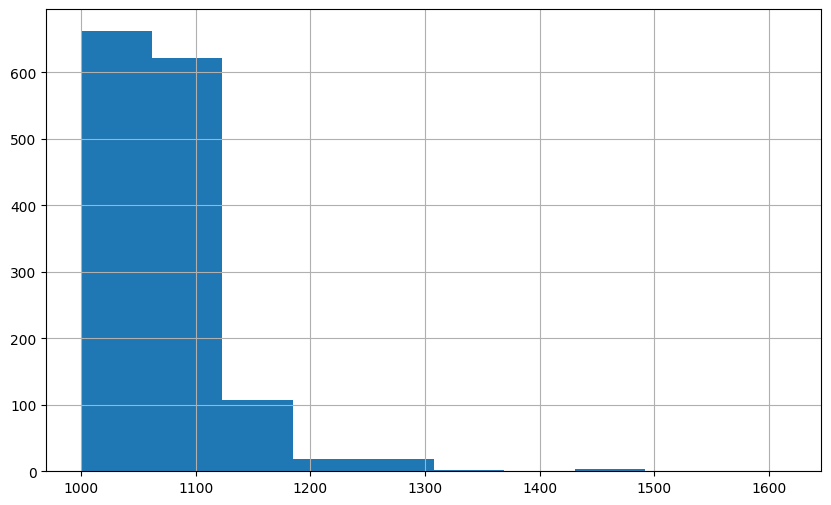

In [ ]:
# Looking at the distribution of weight column
plt.figure(figsize=(10,6))
CarPricesData['Weight'].hist()
plt.show()

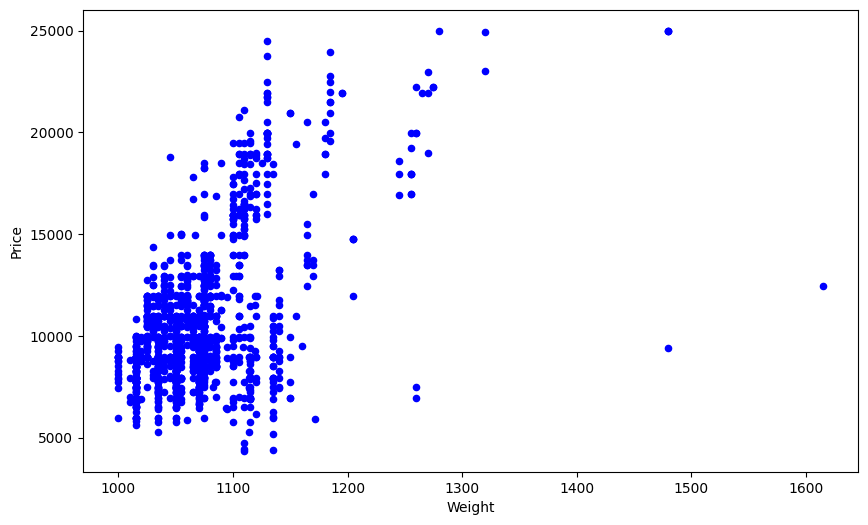

In [ ]:
# Looking at the relation with the target column before removing outlier
CarPricesData.plot.scatter(x='Weight', y='Price', marker='o', color='blue',figsize=(10,6))
plt.show()

In [ ]:
# Removing the outlier values from data
CarPricesData=CarPricesData[CarPricesData['Weight']<1400]

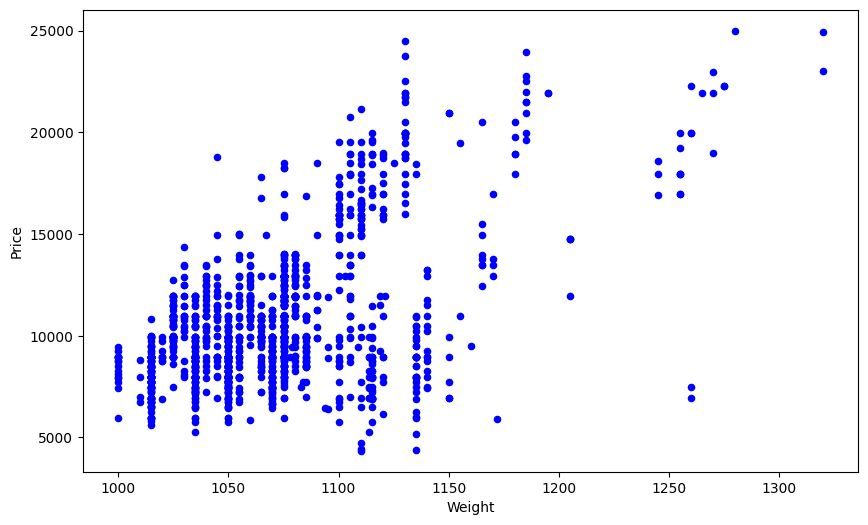

In [ ]:
# Plotting again to see the effect of removing outliers
CarPricesData.plot.scatter(x='Weight', y='Price', marker='o', color='blue',figsize=(10,6))
plt.show()

In [ ]:
# Looking at the correlation with target variable before removing outliers
CarPricesData[['Price','Weight']].corr()

,Price,Weight
Price,1.000000,0.572768
Weight,0.572768,1.000000


In [ ]:
# Removing the outlier values from data
FilterCondition1=CarPricesData['Weight']>1250
FilterCondition2=CarPricesData['Price']<10000

# Printing the outlier rows
print(CarPricesData[FilterCondition1 & FilterCondition2])

RowsToDelete=CarPricesData[FilterCondition1 & FilterCondition2].index
CarPricesData=CarPricesData.drop(RowsToDelete)
CarPricesData

     Price   Age      KM FuelType  HP  MetColor  Automatic      CC  Doors  \
601   7500  50.0       1   Diesel  90         1          0  2000.0      3   
654   6950  65.0  114383   Diesel  90         0          0  2000.0      3   

     Weight  
601  1260.0  
654  1260.0  


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0


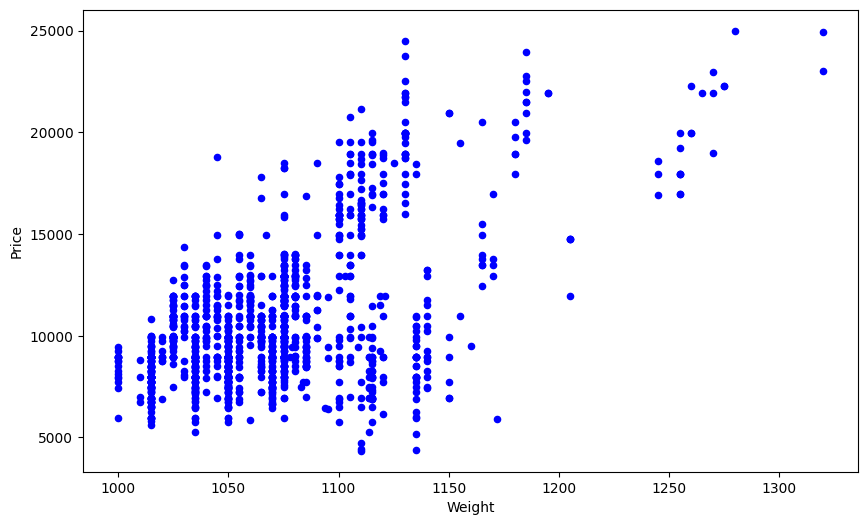

In [ ]:
#  Plotting again to see the effect of removing outliers
CarPricesData.plot.scatter(x='Weight', y='Price', marker='o', color='blue',figsize=(10,6))
plt.show()

## Data Pre-Processing: Converting Categorical data to numeric
1. First Treat all Ordinal variables by manually mapping the numeric values
2. Treat all nominal variables using dummy variables

In [ ]:
# CarPricesData has only one string categorical variable FuelType
# Hence using get_dummies function
CarPricesDataNumeric=pd.get_dummies(CarPricesData)
CarPricesDataNumeric.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,False,True,False
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,False,True,False
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,False,True,False
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,False,True,False
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,False,True,False


## Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data

In [ ]:
# %pip install scikit-learn


In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable ='Price'
Predictors = ['Age'] # Starting with only 1 feature to predict the price, Univariate Regression Model
X = CarPricesDataNumeric[Predictors]#.values
y = CarPricesDataNumeric[TargetVariable]#.values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# If my data splpitting is truly random
# Everytime I run train_test split - I will get a different combination of training and testing data points
# Compare models with each other ? - Some model might be performing better, because of a lucky split

In [ ]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(999, 1)
(999,)
(429, 1)
(429,)



# Univariate (Simple) Linear regression
Linear regression with a single variable or feature is called **univariate linear regression**. The output of linear regression is an estimate of the outcome variable (aka target).

In [ ]:
# X_train, y_train - Train / Fit the model on this data
# Calculate an error for this

# Predict on the X_test data
# Compare the performance, find the error on the test data by using y_test and predicted value

In [ ]:
# import model related libraries
from sklearn.linear_model import LinearRegression

# from sklearn.linear_model import LinearRegression
# Find the import statement of a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# import module to calculate model perfomance metrics # Average Error, Root Mean Square Error, MAPE, MAE, Accuracy, precision, recall
from sklearn import metrics # help you to evaluate the performance of your models

In [ ]:
# Step 4: Fit linear regression model to trainingset
# Linear Regression Model
linreg = LinearRegression() # inititlaising an object  (linreg) of the Linear Regression Class

# X - age
# Y - price
# price = a*age + b

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# solving for a and b - So I get the final eqaution with some values of a and b

LinearRegression()

In [ ]:
linreg.coef_

array([-166.99587751])

In [ ]:
linreg.intercept_

20065.119005732777

In [ ]:
# y = coeff1*input1 + intercept
# price = -166.995*age + 20065.11

In [ ]:
# Metrics in Sklearn - Measurement of Performance of the model
# We want to minimise the error = difference between actual and predicted

In [ ]:
# Actual > Predicted , Actual < Predicted -> Sign of error concern me ?

# e1, e2, e3, e4, e5, ..... e10

# Aggregate Overall level - aggregation function = cause of variability of metrics

# Root Mean Squared Error = square root(((e1)**2+(e2)**2+....e10**2)/ 10)

# MAE - metric for analysing the performance of A Regression Model - we did not change the unit
# MSE - metric for analysing the performance of A Regression Model - unit **2 - which does not make sense
# RMSE - metric for analysing the performance of A Regression Model
# MAPE - metric for analysing the performance of A Regression Model


# error = (actual - predicted) / actual = % error
# Average of % error in each sample


# 2005 -> Car Prices - 4Lkahs - 5 Lakhs -> 1500, 1Lakh - > 98500, 101500
# 2022 -> Car Prices - 8-10 Lakhs -> 1500 , 7 lakhs ->. 698500, 701500

# Compare similarity in movement of the Trend in data points
# R2 Score -> (-infinity to +1 )
# +1 - means perfect correlation in movement
# R2 Score less than 0.7/0.6 - not acceptable in terms of trend movement
# Mathematical Error metrics also - to quantify
# A good R2 Score - tells us that the change in output is accounted for by a change in the input
# You predict 10 for all cases, average error -> 20%
# Your output is in the range 8-12, model is predicting -50

# test data - not seen by the model
# training data - model has seen

In [ ]:
# X_train, y_train
# X_test, y_test
y_pred = linreg.predict(X_test)
# compare y_pred, with y_test - evaluate performance

In [ ]:
len(X_test)

429

In [ ]:
len(y_pred)

429

In [ ]:
y_pred, y_test

(array([16725.20145553,  7373.43231498, 10713.34986518, 13552.27978285,
         8709.39933506,  8709.39933506,  8876.39521257, 11047.3416202 ,
        15389.23443545, 11715.32513024, 13218.28802783,  9043.39109008,
         7206.43643747,  8542.40345755, 13218.28802783,  7373.43231498,
        12717.3003953 , 15222.23855794, 13218.28802783, 15055.24268043,
        16391.20970051, 13719.27566036,  7039.44055996,  8709.39933506,
        14888.24680292, 14554.2550479 , 13385.28390534, 10379.35811016,
         7874.41994751,  9878.37047763, 17727.17672059,  7206.43643747,
         8208.41170253,  9878.37047763,  8709.39933506,  6872.44468245,
        16391.20970051, 13051.29215032,  6705.44880494,  7707.42407   ,
         8709.39933506,  9210.38696759,  6705.44880494,  7707.42407   ,
         7039.44055996, 14554.2550479 , 15055.24268043,  9043.39109008,
         7039.44055996, 12049.31688526,  8709.39933506, 14888.24680292,
         9878.37047763,  9210.38696759,  9210.38696759,  9377.38

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [ ]:
# from sklearn import metrics

# metrics.r2_score()
# metrics.mean_squared_error()
# metrics.mean_absolute_percentage_error()

# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
# r2_score()
# mean_squared_error()
# mean_absolute_percentage_error()

In [ ]:
 # Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, linreg.predict(X_train)))
# r2_score helps us find if the model prediction trend and actual trend is same

# MSE in metrics - Root mean squared error
print('RMSE on Test Data:',np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
# MAPE
print('MAPE:', mean_absolute_percentage_error(y_test,y_pred))

R2 Value: 0.7753312979201091
RMSE on Test Data: 1576.924704956041
MAPE: 0.1141189953159849


In [ ]:
# create a report - and answer the question - are we in the underfitting stage, good fit stage, overfitting stage ?
# Did the performance improve after adding the second variable ?

# 1 Variable - Age
# 2 Variables - Age and KM

# Find the 3 errors on the first model for both train and test
# Find the 3 errors on the second model for both train and test

In [ ]:
TargetVariable ='Price'
Predictors = ['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol']
X = CarPricesDataNumeric[Predictors]
y = CarPricesDataNumeric[TargetVariable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
X_train.shape

(999, 11)

In [ ]:
linreg = LinearRegression() # inititlaising an object  (linreg) of the Linear Regression Class
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [ ]:
print('R2 Train Value:',metrics.r2_score(y_train, y_train_pred))
print('R2 Test Value:',metrics.r2_score(y_test, y_test_pred))

print('RMSE on Train Data:',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('RMSE on Test Data:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('MAPE on train:', mean_absolute_percentage_error(y_train,y_train_pred))
print('MAPE on test:', mean_absolute_percentage_error(y_test,y_test_pred))


R2 Train Value: 0.8862240338633861
R2 Test Value: 0.8783967890114251
RMSE on Train Data: 1191.90737033176
RMSE on Test Data: 1172.7834249060702
MAPE on train: 0.09019008536324556
MAPE on test: 0.09053267854586457


In [ ]:
# R2 Train Value: 0.7753312979201091
# R2 Test Value: 0.7801475456583079
# Accuracy on Train Data: 87.93451271052825
# Accuracy on Test Data: 88.5881004684015
# RMSE on Train Data: 1674.8986305463052
# RMSE on Test Data: 1576.924704956041

After prediction a data scientist should always show how was the performance of the model using different evaluation metrics. One of the most important evaluation metric for linear regression is the coefficient of determination also known as R-squared value ($ R^2 $). The $ R^2 $ is basically a statistical measure of how close the data are to the fitted regression line, by "data" it means our independent variable data, the **engine-size** data. Usually, the larger the $R^2$ value is, the better the model fits the data.

$ R^2 $ is defined as :

\begin{align}
r^2 = \frac{SS_{regression}}{SS_{total}}
\end{align}

\begin{align}
r^2 = 1 - \frac{SS_{error}}{SS_{total}}
\end{align}

Where:
 - $ SS_{regression} $ - "regression sum of squares"; quantifies how far the predicted value is from the mean
 - $ SS_{error} $ - "error sum of squares"; quantifies the variance of the target data points around the regression line
 - $ SS_{total} $ - "total sum of squares"; quantifies the variance of the target data points around the mean

\begin{align}
SS_{regression} = \sum_{i=1}^m(\hat y_i - \bar y)^2
\end{align}

\begin{align}
SS_{error} = \sum_{i=1}^m(y_i - \hat y)^2
\end{align}

\begin{align}
SS_{total} = \sum_{i=1}^m(y_i - \bar y)^2
\end{align}

### Interpreting Model Coefficients

How do we interpret the Age coefficient ($\beta_1$)?
- A "unit" increase in Age of the vehicle is **associated with** a -166.99 "unit" decrease in the price of the vehicle.

Note that if an increase in Age was associated with a **increase** in price, $\beta_1$ would be **positive**.

In [ ]:
['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol']

In [ ]:
# Price = -166.99 * Age + 20065.11

# Age=0 (No Age of the car) -> 20065.11 Baseline price
# For every unit increase of Age - price decrease by - 166.99

print('The value of slope is: ',linreg.coef_)
print('The value of Intercept is: ',linreg.intercept_)

The value of slope is:  [-1.10955425e+02 -1.51089234e-02  3.08846769e+01  5.07647651e+01
 -3.82047658e+01 -3.38138182e+00 -2.00197742e+02  3.55358619e+01
 -1.07479688e+03  3.49019469e+02  7.25777412e+02]
The value of Intercept is:  -17817.5103800674


In [ ]:
# We want to plot the sequential performance of the model on every iteration
# adding input parameters one by one,
# Plot the change in performance of the model with addition of i

## Hypothesis Testing and p-values

Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between Age and Price (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between Age and Price (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [ ]:
# Significant relationship between input and output or not
# p-value -> <0.05 - there is a significant relationship,
# p-value -> >0.05 - there is no significant relationship between Input and Output

# P low ( <0.05 ), null go or P 1 null stay

In [ ]:
X_train

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
578,55.0,33230,110,0,0,1600.0,3,1050.0,False,False,True
814,60.0,70954,110,0,0,1600.0,3,1050.0,False,False,True
1237,78.0,82595,86,1,0,1300.0,3,1015.0,False,False,True
590,48.0,26938,110,1,0,1600.0,3,1040.0,False,False,True
1394,80.0,49580,110,1,0,1600.0,4,1035.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1103,74.0,123077,86,1,0,1300.0,3,1015.0,False,False,True
1138,76.0,104344,110,1,0,1600.0,3,1050.0,False,False,True
1302,77.0,70932,110,1,0,1600.0,3,1050.0,False,False,True
867,66.0,63328,86,0,1,1300.0,5,1065.0,False,False,True


In [ ]:
from sklearn.feature_selection import f_regression
fregression = f_regression(X_train, y_train) #returns Fvalues of features; p values of features
fregression[1]

# array([0.00000000e+00, 1.02907013e-91])) # p-value

array([0.00000000e+000, 1.02907013e-091, 6.62851504e-024, 1.36368242e-003,
       2.28597081e-001, 3.98026358e-007, 1.55643840e-007, 3.37442271e-100,
       1.14099351e-001, 2.35015319e-001, 5.37112180e-001])

a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for Age is far less than 0.05, and so we **believe** that there is a relationship between Age and Price.

Note that we generally ignore the p-value for the intercept.

In [ ]:
# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults.head()
TestingDataResults[('Predicted_'+TargetVariable)]=np.round(y_pred)
TestingDataResults.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,Predicted_Price
127,20.0,35000,97,1,0,1400.0,5,1110.0,False,False,True,16500,16725.0
1197,76.0,89520,110,1,0,1600.0,3,1050.0,False,False,True,8950,7373.0
467,56.0,66777,110,0,0,1600.0,5,1090.0,False,False,True,11950,10713.0
356,39.0,24723,110,1,1,1600.0,4,1060.0,False,False,True,12695,13552.0
1017,68.0,35000,110,1,0,1600.0,3,1050.0,False,False,True,8900,8709.0


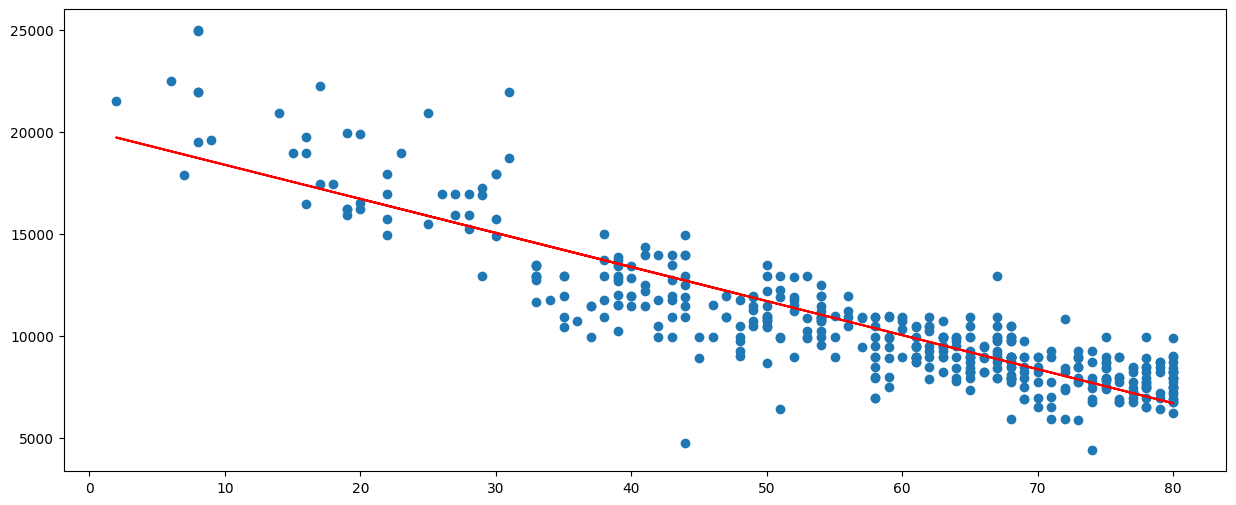

In [ ]:
# Visualizing the line of best fit
plt.figure(figsize=(15,6))
plt.scatter(x=TestingDataResults['Age'] , y=TestingDataResults['Price'])
plt.plot(TestingDataResults['Age'] , TestingDataResults['Predicted_Price'], color='red')
plt.show()

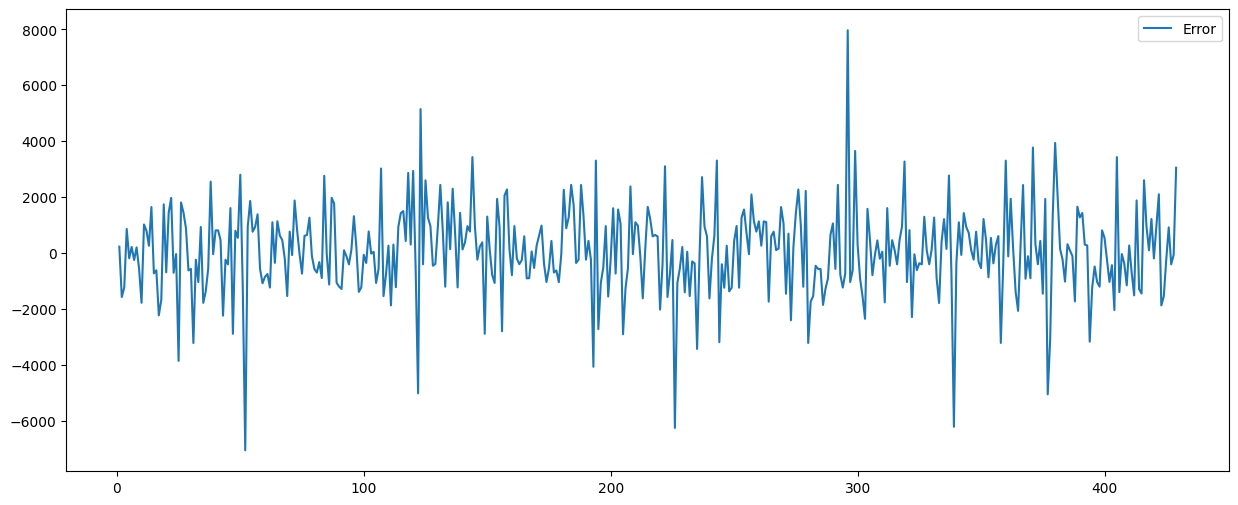

In [ ]:
y_error = y_pred - y_test

x = np.arange(1,len(y_pred)+1)
plt.figure(figsize=(15,6))
plt.plot(x,y_error , label = 'Error')
plt.legend()
plt.show()

#linear regression error should be homoscedastic

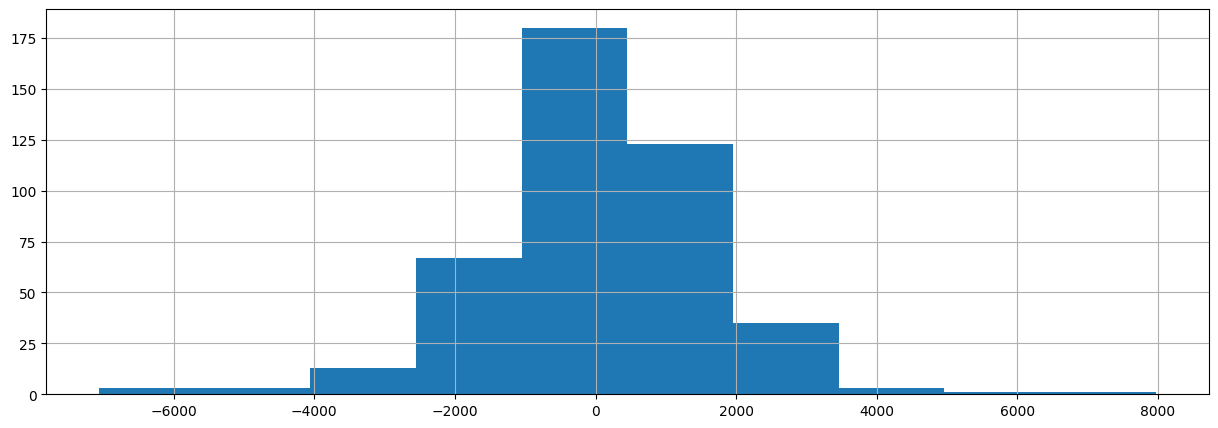

In [ ]:
y_error.hist(figsize=(15,5))
plt.show()

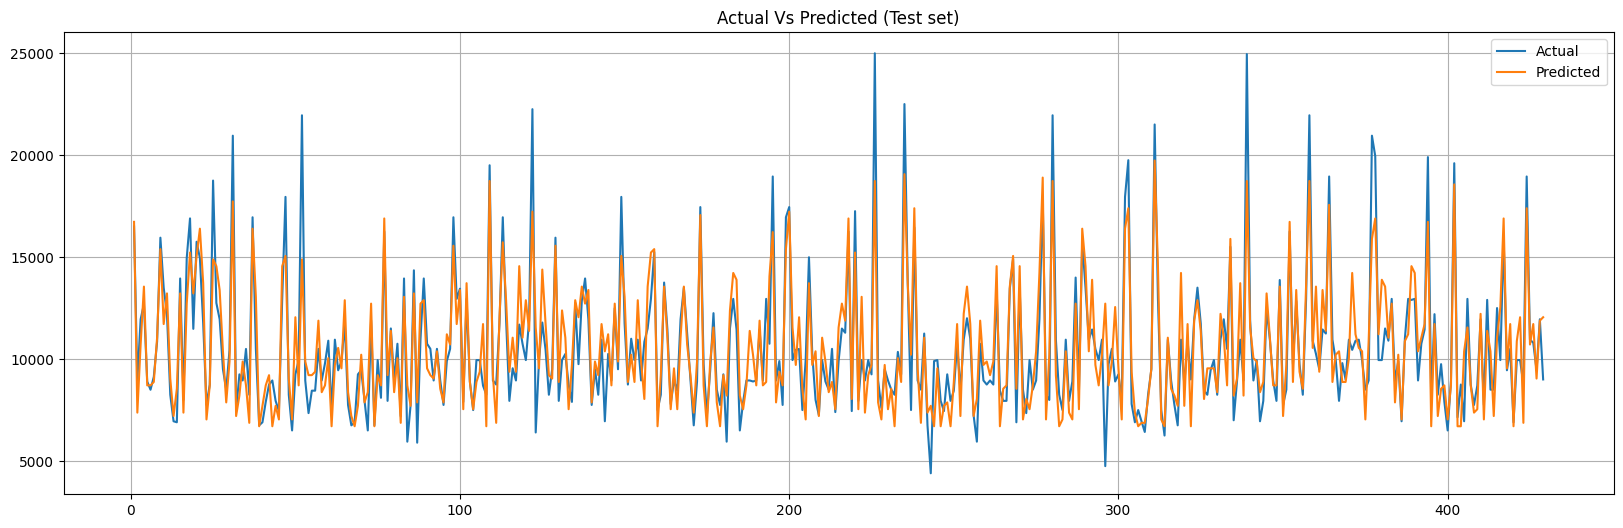

In [ ]:
x=np.arange(1,len(y_test)+1)
plt.figure(figsize=(20,6))
plt.plot(x,y_test,label='Actual')
plt.plot(x,y_pred,label='Predicted')
plt.title("Actual Vs Predicted (Test set)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Polynomial Regression
Many relationships of interest, however, are not strictly linear. Often we want to model a non-linear relationship—for example, the relationship between the number of hours a student studies and the score she gets on the test. Intuitively, we can imagine there is a big difference in test scores between students who study for one hour compared to students who did not study at all. However, there is a much smaller difference in test scores between a student who studied for 99
hours and a student who studied for 100 hours. The effect one hour of studying has on a student’s test score decreases as the number of hours increases.

What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

In [ ]:
# Convert our linear data - to polynomial data and train a regression model

In [ ]:
# Import libraries for Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
# X - X` ( original independent features - polynomial features )
# y -> y

In [ ]:
# y = ax1 + bx2**2 + cx1x3 + d
# x1, x2, x3  -> Original Form
# y = 2.3x1+ 0.00005*x2, 0.00002*x3, 0.00005*x1^2, 3.4*x2^2, x3^2 , x1x2, x2x3, x3x1 -> Polynomial form ( Max Power = 2)

In [ ]:
#read csv file
#data_link = "http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv"
#data = pd.read_csv(data_link, index_col=0)
CarPricesData.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [ ]:
# create a Python list of feature names
feature_names=["Age","KM"]
# feature_names=["Age"]

# use the list to select a subset of the original DataFrame
X = CarPricesData[feature_names]

# sales
y = CarPricesData['Price']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=3) # MUST SPECIFY THE MAXIMUM DEGREE of the Polynomial

# X_poly = poly.fit_transform(X)
# train_test_split(X_poly , y)

X = poly.fit_transform(X) # poly.fit(X) , poly.transform(X) => poly.fit_transform(X)

In [ ]:
# Polynomial feature Transformation before or after doing the train test split

In [ ]:
# Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.20)

In [ ]:
X_train

array([[1.00000000e+00, 4.40000000e+01, 3.95160000e+04, ...,
        7.65029760e+07, 6.87066273e+10, 6.17047973e+13],
       [1.00000000e+00, 5.90000000e+01, 7.13660000e+04, ...,
        2.48425046e+08, 3.00493251e+11, 3.63474600e+14],
       [1.00000000e+00, 7.60000000e+01, 1.54900000e+05, ...,
        8.94702400e+08, 1.82354476e+12, 3.71667215e+15],
       ...,
       [1.00000000e+00, 8.00000000e+01, 1.22820000e+05, ...,
        7.86048000e+08, 1.20678019e+12, 1.85270929e+15],
       [1.00000000e+00, 3.80000000e+01, 5.87980000e+04, ...,
        8.49043120e+07, 1.31373783e+11, 2.03276728e+14],
       [1.00000000e+00, 6.90000000e+01, 1.55000000e+05, ...,
        7.37955000e+08, 1.65772500e+12, 3.72387500e+15]])

In [ ]:
# target data - what we are predicting - no change / transformation
# X values - X_train and X_test

In [ ]:
# Linear Regression Model
plinreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
plinreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# make predictions on the testing set
y_pred = plinreg.predict(X_test)

In [ ]:
# compute the RMSE of our predictions
print("RMSE=",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Rsquare=",metrics.r2_score(y_test,y_pred))


RMSE= 1316.1891146497599
Rsquare= 0.8617941149959591


In [ ]:
df_predicted=pd.DataFrame()
df_predicted['Actual']=y_test
df_predicted['Predicted']=y_pred
df_predicted

,Actual,Predicted
577,11950,10609.638198
288,11895,12362.681021
661,9750,8386.366144
241,12450,13286.761861
947,8950,9050.438254
...,...,...
865,9500,9117.056796
888,11250,9678.438266
1395,8750,8429.341403
1106,7950,7682.953221


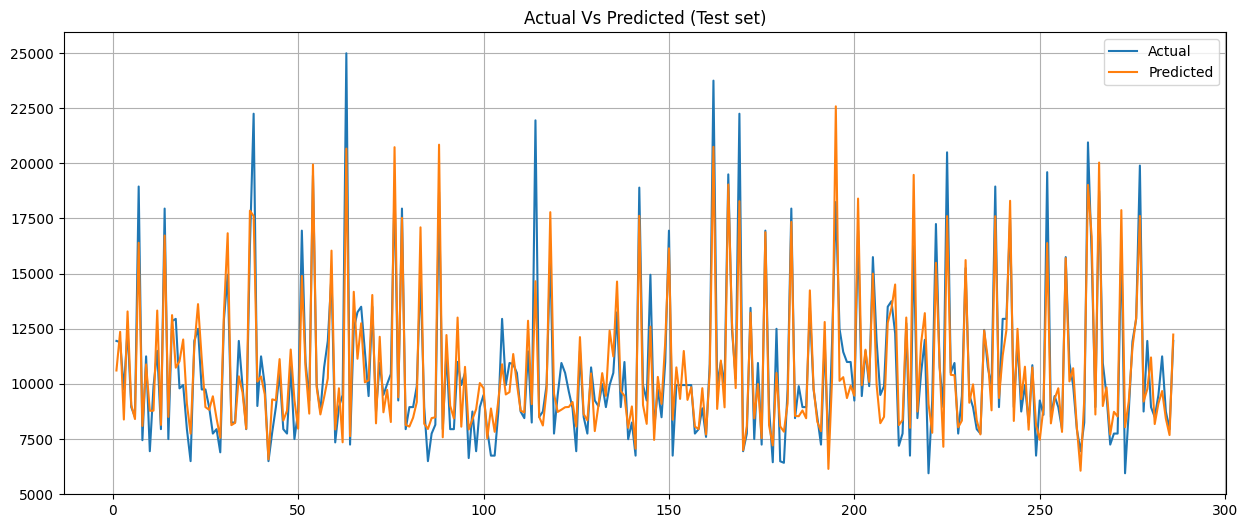

In [ ]:
x=np.arange(1,len(y_test)+1)
plt.figure(figsize=(15,6))
plt.plot(x,y_test,label='Actual')
plt.plot(x,y_pred,label='Predicted')
plt.title("Actual Vs Predicted (Test set)")
plt.legend(loc="best")
plt.grid(True)

# Reducing Variance with Regularization

- Problem</br>
    You want to reduce the variance of your linear regression model

- Solution</br>
    Use a learning algorithm that includes a shrinkage penalty (also called regularization) like ridge regression and lasso regression:

In [ ]:
# import necessary library
from sklearn.linear_model import Ridge
# from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

# load the data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# scaling the datapoints
scaler = StandardScaler()
features_standardized = scaler.fit_transform(data)

# build the model
regression = Ridge(alpha=0.5)
model = regression.fit(features_standardized, target)

# The coefficients from both models should be different due to the different scaling methods.
# The MSE and MAPE values will help us understand which scaling method performed better.
# The VIF values indicate multicollinearity among features, with values > 10 generally indicating high multicollinearity.

# Choosing the optimal alpha:
# The choice of alpha can significantly affect the model's performance.
# To choose the optimal alpha, we can use techniques like cross-validation.
# This involves splitting the data into training and validation sets, training the model with different alpha values,
# and selecting the one that results in the lowest validation error.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Assign column names
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
data_df = pd.DataFrame(data, columns=columns)

# Standard Scaler
scaler_standard = StandardScaler()
features_standardized = scaler_standard.fit_transform(data_df)

# Build the model with Standard Scaled data
alpha = 0.5
regression_standard = Ridge(alpha=alpha)
model_standard = regression_standard.fit(features_standardized, target)

# Min-Max Scaler
scaler_minmax = MinMaxScaler()
features_minmax = scaler_minmax.fit_transform(data_df)

# Build the model with Min-Max Scaled data
regression_minmax = Ridge(alpha=alpha)
model_minmax = regression_minmax.fit(features_minmax, target)

# Predict using both models
predictions_standard = model_standard.predict(features_standardized)
predictions_minmax = model_minmax.predict(features_minmax)

# Calculate Mean Squared Error (MSE) for both models
mse_standard = mean_squared_error(target, predictions_standard)
mse_minmax = mean_squared_error(target, predictions_minmax)

# Calculate Mean Absolute Percentage Error (MAPE) for both models
mape_standard = mean_absolute_percentage_error(target, predictions_standard)
mape_minmax = mean_absolute_percentage_error(target, predictions_minmax)

# Display coefficients of both models
print("Coefficients with Standard Scaled data:")
print(model_standard.coef_)
print("\nCoefficients with Min-Max Scaled data:")
print(model_minmax.coef_)

# Display MSE of both models
print("\nMean Squared Error with Standard Scaled data: {:.4f}".format(mse_standard))
print("Mean Squared Error with Min-Max Scaled data: {:.4f}".format(mse_minmax))

# Display MAPE of both models
print("\nMean Absolute Percentage Error with Standard Scaled data: {:.4f}".format(mape_standard))
print("Mean Absolute Percentage Error with Min-Max Scaled data: {:.4f}".format(mape_minmax))



Coefficients with Standard Scaled data:
[-0.92396151  1.07393055  0.12895159  0.68346136 -2.0427575   2.67854971
  0.01627328 -3.09063352  2.62636926 -2.04312573 -2.05646414  0.8490591
 -3.73711409]

Coefficients with Min-Max Scaled data:
[ -8.01978752   4.16699284   0.10036392   2.79936424  -7.71902211
  19.26963441   0.06926834 -14.63575552   6.23787946  -5.80425744
  -8.84899508   3.71559548 -18.77886787]

Mean Squared Error with Standard Scaled data: 21.8951
Mean Squared Error with Min-Max Scaled data: 21.9648

Mean Absolute Percentage Error with Standard Scaled data: 0.1641
Mean Absolute Percentage Error with Min-Max Scaled data: 0.1626


### Results Interpretation
- The coefficients from both models should be different due to the different scaling methods.
- The MSE and MAPE values will help us understand which scaling method performed better.
- The VIF values indicate multicollinearity among features, with values > 10 generally indicating high multicollinearity.

### Choosing the Optimal Alpha
- The choice of alpha can significantly affect the model's performance.
- To choose the optimal alpha, we can use techniques like cross-validation.
- This involves splitting the data into training and validation sets, training the model with different alpha values, and selecting the one that results in the lowest validation error.



---



## Variance Inflation Factor (VIF)

### What is VIF?
VIF measures the multicollinearity (correlation between independent variables) in regression models.
High multicollinearity can inflate the variance of the coefficient estimates and make the model unstable.

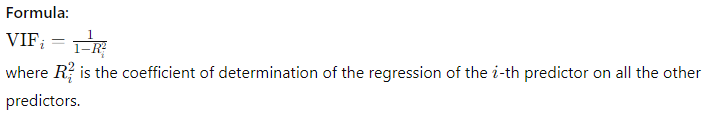

### Interpreting VIF Values
- **VIF = 1**: No correlation between the \(i\)-th predictor and the other predictors.
- **1 < VIF < 5**: Moderate correlation, but not severe enough to be problematic.
- **VIF > 5**: High correlation, indicating potential multicollinearity issues.
- **VIF > 10**: Very high correlation, indicating serious multicollinearity problems.




In [ ]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = columns
vif_data["VIF"] = [variance_inflation_factor(data_df.values, i) for i in range(data_df.shape[1])]

print("\nVariance Inflation Factor (VIF) for each feature:")
print(vif_data)



---



In standard linear regression the model trains to minimize the sum of squared error between the true($y_{i}$) and prediction ($\hat{y}$) target values, or residual sum of squares (RSS):
$$RSS==\sum^n_{i=1} (y_{i}-\hat{y}_i)^2$$
Regularized regression learners are similar, except they attempt to minimize RSS and some penalty for the total size of the coefficient values, called a shrinkage penalty because it attempts to "shrink" the model. There are two common types of regularized learners for linear regression: ridge regression and the lasso. The only formal difference is the type of shrinkage penalty used. In ridge regression, the shrinkage penalty is a tuning hyperparameter multiplied by the squared sum of all coefficients:
$$RSS+\alpha \sum^p_{j=1} \hat{\beta_{j}}^2$$
where $\hat{\beta_{j}}$ is the coefficient of the jth of p features and $\alpha$ is a hyperparameter (discussed next). The lasso is similar, except the shrinkage penalty is a tuning hyperparmeter multiplied by the squared sum of all coefficients:
$$\frac{1}{2n}RSS+\alpha \sum^p_{j=1} \begin{vmatrix}\hat{\beta_{j}}\end{vmatrix}$$
where n is the number of observations. So which one should we use? A a very general rule of thumb, ridge regression often produces slightly better predictions than lasso, but lasso (for reasons we will discuss next) produces more interpretable models. If we want a balance between, ridge and lasso's penalty functions we can use elastic net, which is simply a regression model with both penalties included. Regardless of which one we use, both ridge and lasso regresions can penalize large or complex models by including coefficient values in the loss funciton we are trying to minimize

The hyper parameter $\alpha$ lets us control how much we penalize the coefficients, with higher values of $\alpha$ creating simpler models. The ideal value of $\alpha$ should be tuned like any other hyperparameter. In scikit-learn, $\alpha$ is set using the alpha parameter.

scikit-learn includes a RidgeCV method that allows us to select the ideal value for $\alpha$ :

In [ ]:
from sklearn.linear_model import RidgeCV

regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])

model_cv = regr_cv.fit(features_standardized, target)

model_cv.coef_

array([-0.91987132,  1.06646104,  0.11738487,  0.68512693, -2.02901013,
        2.68275376,  0.01315848, -3.07733968,  2.59153764, -2.0105579 ,
       -2.05238455,  0.84884839, -3.73066646])

In [ ]:
# view alpha
model_cv.alpha_

1.0

One final note: because in linear regression the value of the coefficients is partially determined by the scale of the feature, and in regularized models all coefficients are summed together, we must make sure to standardize the feature prior to training

# Reducing Features with Lasso Regression

- Problem</br>
    You want to simplify your linear regression model by reducing the number of features.</br>

- Solution</br>
    Use a lasso regression

In [ ]:
# import necessary library
from sklearn.linear_model import Ridge
# from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

# load the data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# scaling the datapoints
scaler = StandardScaler()
features_standardized = scaler.fit_transform(data)

# build the model
regression = Ridge(alpha=0.5)
model = regression.fit(features_standardized, target)

One interesting characteristic of lasso regression's penalty is that it can shrink the coefficients of a model to zero, effectively reducing the number of features in the model. For example, in our solution we set $\alpha$ to 0.5 and we can see that many of the coefficients are 0, meaning their corresponding features are not used in the model:

In [ ]:
model.coef_

array([-0.92396151,  1.07393055,  0.12895159,  0.68346136, -2.0427575 ,
        2.67854971,  0.01627328, -3.09063352,  2.62636926, -2.04312573,
       -2.05646414,  0.8490591 , -3.73711409])

However if we increase $\alpha$ to a much higher value, we see that lierally none of the features are being used:

In [ ]:
from sklearn.linear_model import Lasso
regression_a10 = Lasso(alpha=10)
model_a10 = regression_a10.fit(features_standardized, target)
model_a10.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

The practical benefit of this effect is that it means that we could include 100 features in our feature matrix and then, through adjusting lasso's $\alpha$ hyperparameter, produce a model that uses only 10 (for instance) of the most important features. This lets us reduce variance whiel improving interpretability of our model (since fewer features is easier to explain)